# 075.실습 - Titanic 호 data 를 이용한 Feature Engineering 과 Modeling

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  $\rightarrow$ 객실 등급  
survival -  Survival (0 = No; 1 = Yes)  $\rightarrow$ 생존여부  
name - Name  
sex - Sex  
age - Age  
sibsp - Number of Siblings/Spouses Aboard  $\rightarrow$ 함께 탑승한 형제 또는 배우자 수   
parch - Number of Parents/Children Aboard  $\rightarrow$ 함께 탑승한 부모 또는 자녀 수  
ticket - Ticket Number  
fare - Passenger Fare (British pound)  
cabin - Cabin  $\rightarrow$ 선실번호  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  $\rightarrow$ 탑승한 항구

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
df_titanic = pd.read_csv("datasets/titanic.csv")

In [32]:
df_titanic.shape

(891, 12)

In [33]:
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [34]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [35]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [36]:
df_titanic.isnull()

Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
0       False   False  False  False  False  False  False     False
1       False   False  False  False  False  False  False     False
2       False   False  False  False  False  False  False     False
3       False   False  False  False  False  False  False     False
4       False   False  False  False  False  False  False     False
..        ...     ...    ...    ...    ...    ...    ...       ...
886     False   False  False  False  False  False  False     False
887     False   False  False  False  False  False  False     False
888     False   False  False   True  False  False  False     False
889     False   False  False  False  False  False  False     False
890     False   False  False  False  False  False  False     False

[891 rows x 8 columns]

In [37]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

- 891 개의 data 중 177 개를 drop 시키는 것은 너무 많은 양이므로 Age 는 median 으로 채워주고, 
- Embarked 가 null 인 record 는 2 개에 불과 하므로 drop

In [38]:
df_titanic.loc[df_titanic.Embarked.isnull()]

Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

In [39]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [40]:
df_titanic.dropna(inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## outlier 검출

- outlier 가 prediction(특히 regression) 에 영향을 큰 영향을 줄 수 있으므로, 연속값으로 구성된 column 의 outlier 검출

- outlier 의 정의는 일반적으로 IQR(Inter-quartile range, Q3 - Q1) * 1.5 보다 큰 경우로 한다.

-  세개 이상의 outlier 값을 가진 row 를 drop 시킨다.

In [42]:
THRESHOLD_OUTLIER = 3  # 3 개 이상의 outlier 를 동시에 가진 경우 drop

outlier_indices = []

for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    Q1 = np.percentile(df_titanic[col], 25)
    Q3 = np.percentile(df_titanic[col], 75)
    IQR = Q3 - Q1   
    outlier_step = IQR * 1.5
    outlier_list = df_titanic[(df_titanic[col] < Q1 - outlier_step) | 
                                       (df_titanic[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list)

In [43]:
len(outlier_indices)

438

In [44]:
print(outlier_indices[:100])

[7, 11, 15, 16, 33, 54, 78, 94, 96, 116, 119, 152, 164, 170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305, 326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 831, 851, 879, 7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642]


### Counter

- 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체

- Counter(list) --> {element: 갯수} 의 dictionary 반환

In [45]:
from collections import Counter

In [46]:
multiple_outliers = list(k for k, v in Counter(outlier_indices).items() if v >= THRESHOLD_OUTLIER)
print(multiple_outliers)

[7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [47]:
df_titanic.loc[multiple_outliers, ['Age', 'SibSp', 'Parch', 'Fare']][:10]

Age  SibSp  Parch      Fare
7     2.00      3      1   21.0750
16    2.00      4      1   29.1250
119   2.00      4      2   31.2750
164   1.00      4      1   39.6875
268  58.00      0      1  153.4625
297   2.00      1      2  151.5500
305   0.92      1      2  151.5500
386   1.00      5      2   46.9000
438  64.00      1      4  263.0000
587  60.00      1      1   79.2000

In [48]:
df_titanic.loc[:, ['Age', 'SibSp', 'Parch', 'Fare']].describe()

Age       SibSp       Parch        Fare
count  889.000000  889.000000  889.000000  889.000000
mean    29.315152    0.524184    0.382452   32.096681
std     12.984932    1.103705    0.806761   49.697504
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.895800
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

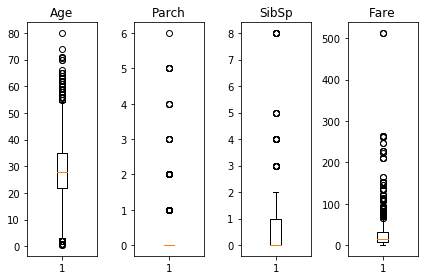

In [49]:
plt.subplot(141)
plt.boxplot(df_titanic['Age'])
plt.title('Age')

plt.subplot(142)
plt.boxplot(df_titanic['Parch'])
plt.title('Parch')

plt.subplot(143)
plt.boxplot(df_titanic['SibSp'])
plt.title('SibSp')

plt.subplot(144)
plt.boxplot(df_titanic['Fare'])
plt.title('Fare')

plt.tight_layout()

- outlier 3 개 이상을 동시에 가진 row drop

In [52]:
df_titanic.drop(multiple_outliers).head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          0       3    male  22.0      1      0   7.2500        S
1          1       1  female  38.0      1      0  71.2833        C
2          1       3  female  26.0      0      0   7.9250        S
3          1       1  female  35.0      1      0  53.1000        S
4          0       3    male  35.0      0      0   8.0500        S
5          0       3    male  28.0      0      0   8.4583        Q
6          0       1    male  54.0      0      0  51.8625        S
8          1       3  female  27.0      0      2  11.1333        S
9          1       2  female  14.0      1      0  30.0708        C
10         1       3  female   4.0      1      1  16.7000        S

In [53]:
df_titanic = df_titanic.drop(multiple_outliers).reset_index(drop=True)
df_titanic.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male  28.0      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         1       3  female  27.0      0      2  11.1333        S
8         1       2  female  14.0      1      0  30.0708        C
9         1       3  female   4.0      1      1  16.7000        S

## Feature Analysis

- feature 간의 correlation check

- Survived 와 각 Feature 간 상관관계 파악

In [54]:
df_titanic.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.329670 -0.089312  0.032897  0.109136  0.271161
Pclass   -0.329670  1.000000 -0.328153  0.044240  0.032690 -0.546755
Age      -0.089312 -0.328153  1.000000 -0.242726 -0.178178  0.094139
SibSp     0.032897  0.044240 -0.242726  1.000000  0.365293  0.113721
Parch     0.109136  0.032690 -0.178178  0.365293  1.000000  0.146178
Fare      0.271161 -0.546755  0.094139  0.113721  0.146178  1.000000

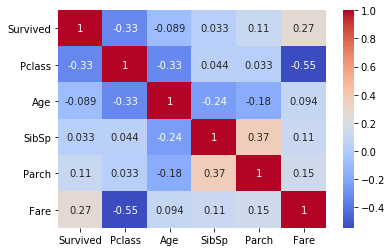

In [55]:
import seaborn as sns

sns.heatmap(df_titanic.corr(), annot=True, cmap="coolwarm");

가장 상관 관계가 높은 feature 는 Fare 이고 Pclass 는 역의 상관 관계를 가진 것으로 나타난다. 즉 3 등칸 보다 1 등칸이 survival 할 확률 높음.

## Data 의 skewness  check

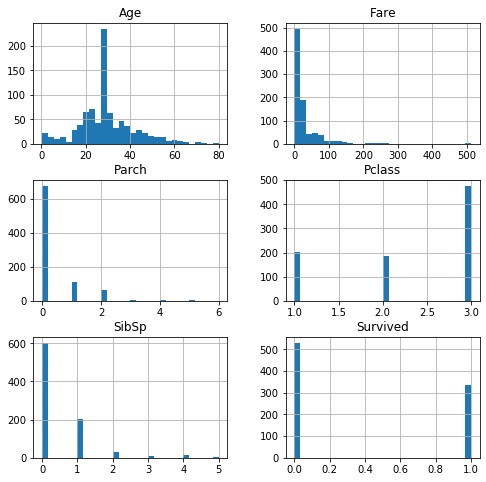

In [50]:
df_titanic.hist(bins=30, figsize=(8, 8));

### Fare 의 분포가 심하게 skew 되어 있으므로 log 값으로 바꾸어 skewness 를 완화 시킨다.

In [56]:
df_titanic['Fare'] = df_titanic['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

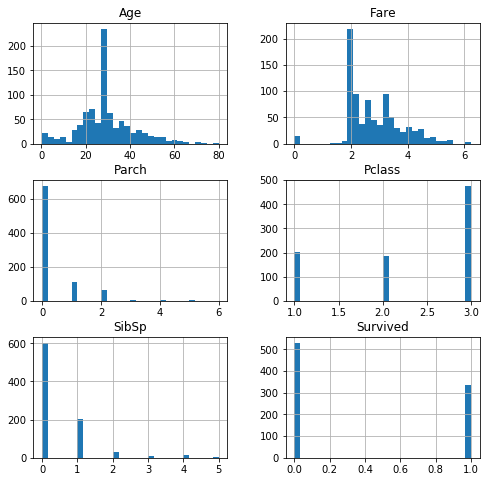

In [57]:
df_titanic.hist(bins=30, figsize=(8, 8));

In [58]:
df_titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         0       3    male  22.0      1      0  1.981001        S
1         1       1  female  38.0      1      0  4.266662        C
2         1       3  female  26.0      0      0  2.070022        S
3         1       1  female  35.0      1      0  3.972177        S
4         0       3    male  35.0      0      0  2.085672        S

## Category 변수 처리

Category column 들을 one-hot-encoding 으로 변환한다.

In [59]:
df_titanic = pd.get_dummies(df_titanic)
df_titanic.head()

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0  1.981001           0         1   
1         1       1  38.0      1      0  4.266662           1         0   
2         1       3  26.0      0      0  2.070022           1         0   
3         1       1  35.0      1      0  3.972177           1         0   
4         0       3  35.0      0      0  2.085672           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [60]:
df_titanic.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.329670 -0.089312  0.032897  0.109136  0.350867   
Pclass     -0.329670  1.000000 -0.328153  0.044240  0.032690 -0.680620   
Age        -0.089312 -0.328153  1.000000 -0.242726 -0.178178  0.113575   
SibSp       0.032897  0.044240 -0.242726  1.000000  0.365293  0.302237   
Parch       0.109136  0.032690 -0.178178  0.365293  1.000000  0.284385   
Fare        0.350867 -0.680620  0.113575  0.302237  0.284385  1.000000   
Sex_female  0.549576 -0.128241 -0.089924  0.150971  0.258595  0.268242   
Sex_male   -0.549576  0.128241  0.089924 -0.150971 -0.258595 -0.268242   
Embarked_C  0.164564 -0.242828  0.009779 -0.023220  0.001795  0.284144   
Embarked_Q  0.005206  0.221436 -0.025803 -0.017227 -0.074037 -0.160655   
Embarked_S -0.147520  0.072976  0.007726  0.031231  0.045186 -0.147574   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.549576 -0.549576    0.164564    0.005206   -0.147520  
Pclass       -0.128241  0.128241   -0.242828    0.221436    0.072976  
Age          -0.089924  0.089924    0.009779   -0.025803    0.007726  
SibSp         0.150971 -0.150971   -0.023220   -0.017227    0.031231  
Parch         0.258595 -0.258595    0.001795   -0.074037    0.045186  
Fare          0.268242 -0.268242    0.284144   -0.160655   -0.147574  
Sex_female    1.000000 -1.000000    0.088470    0.080858   -0.128607  
Sex_male     -1.000000  1.000000   -0.088470   -0.080858    0.128607  
Embarked_C    0.088470 -0.088470    1.000000   -0.150885   -0.781158  
Embarked_Q    0.080858 -0.080858   -0.150885    1.000000   -0.499320  
Embarked_S   -0.128607  0.128607   -0.781158   -0.499320    1.000000

## Train / Test dataset split

In [61]:
df_titanic.shape

(864, 11)

In [62]:
X_train = df_titanic[:700]
X_test  = df_titanic[700:]

In [63]:
y_train = X_train.pop('Survived')
y_test  = X_test.pop('Survived')

## Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Modeling

- 어떤 algorithm 이 가장 적합한지 알지 못하므로 k-fold cross-validation 을 통하여 algorithm 비교. 일단은 default parameter 를 사용한다.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_fold = 10

In [70]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RMF', RandomForestClassifier(n_estimators=10)))
models.append(('GBM', GradientBoostingClassifier()))

In [71]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=n_fold)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("{}: {:.5f} ({:.5f})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.78714 (0.03094)
KNN: 0.80000 (0.04562)
CART: 0.78429 (0.06008)
SVM: 0.80286 (0.03823)
RMF: 0.78857 (0.05063)
GBM: 0.83429 (0.03681)


## Algorithm Parameter Tunning

- 가장 성능이 좋았던 KNN 과 SVC 및 GBM 에 대하여 GridSearchCV 를 이용하여 parameter tunning 을 한다.

In [72]:
from sklearn.model_selection import GridSearchCV

## Grid Search of KNN

In [66]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}


In [67]:
grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                                param_grid = param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best param : {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best param : 0.81286 using {'n_neighbors': 13}


## Grid Search of SVC

In [73]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = c_values, kernel = kernel_values)
param_grid

{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [74]:
grid = GridSearchCV(estimator=SVC(gamma='scale'), 
                                param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best param : {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best param : 0.80429 using {'C': 0.3, 'kernel': 'rbf'}


## Grid Search of GBM

In [75]:
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 5, 7, 9]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)
param_grid

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9]}

In [76]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best param : {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best param : 0.83286 using {'max_depth': 3, 'n_estimators': 100}
